### Кластеризация клиентов на основе маркетинговых показателей

Цель задания:
Сегментировать клиентов компании на кластеры на основе маркетинговых данных, проанализировать полученные кластеры, выполнить их профилирование и сформировать маркетинговые рекомендации для каждого кластера.

1. Предварительная обработка данных
   
1.1. Загрузить датасет, выполнить разведочный анализ, подготовить новые признаки:

- Вывести общую информацию о данных (размер, типы данных, наличие пропусков).
- Проверить наличие пропущенных значений и обработать их.
- Произвести анализ признаков на аномальные значения, то есть выбросов, и обработать их.
- Поработайте с категориальными признаками, некоторые категории в них избыточны.
- Построить графики и визуализировать распределение основных признаков.
- Исследовать корреляции между числовыми признаками
- Доделайте разведочный анализ. Двумя пунктами выше не стоит ограничиваться, проявите фантазию и умение работать с данными.
- Сгенерируйте новые признаки на основании тех данных, которые есть. Минимум 5 новых признаков. Необходимо описать генерируемые признаки и почему они помогут для эффективной кластеризации.
  
1.2. Подготовить данные для кластеризации:

- Нормализовать числовые признаки, связанные с тратами и покупками.
- Сделать энкодинг для категориальных признаков.
- Выбрать только релевантные признаки для кластеризации, либо использовать методы понижения размерности, если это повышает качество кластеризации.

2. Проведение кластеризации

2.1. Выполнить кластеризацию клиентов, используя разные методы.

2.2. Определить оптимальное количество кластеров.

2.3. Оцените качество полученной кластеризации.

2.4. Проведите кластеризацию наилучшим образом и сохраните результат кластеризации в новый столбец датасета.
    
3. Профилирование кластеров

3.1. Описать каждый кластер, выявить их основные особенности, например:

- Средние значения ключевых показателей (например, траты на продукты, количество покупок через интернет или каталог).
- Распределение демографических характеристик (например, семейное положение, количество детей).
- Поведение в маркетинговых кампаниях (например, какая доля приняла предложения).

3.2. Построить визуализации для лучшего понимания кластеров (гистограммы, коробчатые диаграммы, круговые диаграммы).

3.3. Сформировать текстовое описание каждого кластера:

- Кто эти клиенты?
- Какие у них потребности и предпочтения?

4. Формирование маркетинговых рекомендаций

4.1. На основе анализа кластеров сформировать индивидуальные предложения для каждого сегмента клиентов, например:

- Скидка на веганские продукты для клиентов, которые активно покупают фрукты и избегают трат на мясо.
- Скидка для многодетных семей для клиентов с высоким числом детей и активными покупками через каталоги.
- Специальные предложения для любителей вина, если кластер выделяется высоким расходом на вино.

4.2. Описать, как эти рекомендации помогут улучшить маркетинговую стратегию компании.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)                   #  отображать 100 столбцов без  "..." в конце

dataset = pd.read_csv('./dataset.csv')
dataset.describe()

,CustomerID,BirthYear,AnnualIncome,NumChildren,NumTeenagers,DaysSinceLastPurchase,SpentOnWines,SpentOnFruits,SpentOnMeat,SpentOnFish,SpentOnSweets,SpentOnGold,DiscountedPurchases,OnlinePurchases,CatalogPurchases,InStorePurchases,WebsiteVisitsLastMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,FiledComplaint,ContactCost,RevenueGenerated,LastCampaignResponse
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [35]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataset) # ProfileReport - это основной класс, который используется для создания отчета профилирования

In [37]:
profile.to_notebook_iframe() # метод для отображения сгенерированного отчета непосредственно 

In [67]:
# CustomerID - уникальное значение
# BirthYear - есть 3 очень аномальных значения 1900, 1899 и 1893, не вписываются в остальное распределение
# MartialStatus - есть 3 аномальные категории Alone, Absurd и YOLO, Alone можно переименовать в Single, Absurd и YOLO явно вводилось "по приколу"
# AnnualIncome - есть 24 пропущенных значения (чуть больше 1%), надо будет использовать imputer. есть аномально высокое значение 666666 - скорее всего тоже вводилось "по приколу"
# NumChildren / NumTeenagers - что-то странное, потому что в сумме подростков больше, чем детей, т.е. дети - не подростки? или подростки - не дети?
# SpentOn* - высокая корреляция с большим количеством других полей
# AcceptedCampaign5 - высокая корреляция со SpentOnWine, возможно кампания 5 была как раз связана с вином или алкоголем
# ContactCost, RevenueGenerated - константы, скорее всего можно убрать

In [4]:
dataset_cleaned = dataset
dataset_cleaned = dataset_cleaned.drop(dataset_cleaned[dataset_cleaned.BirthYear.isin([1900, 1899, 1893])].index)
dataset_cleaned = dataset_cleaned.replace(to_replace='Alone', value='Single')
dataset_cleaned = dataset_cleaned.drop(dataset_cleaned[dataset_cleaned.MaritalStatus.isin(['Absurd', 'YOLO'])].index)
dataset_cleaned = dataset_cleaned.drop(dataset_cleaned[dataset_cleaned.AnnualIncome == 666666].index)
dataset_cleaned = dataset_cleaned.drop(columns=['ContactCost', 'RevenueGenerated', 'CustomerID'])
len(dataset_cleaned)

2232

In [5]:
dataset_cleaned.dtypes

BirthYear                   int64
EducationLevel             object
MaritalStatus              object
AnnualIncome              float64
NumChildren                 int64
NumTeenagers                int64
EnrollmentDate             object
DaysSinceLastPurchase       int64
SpentOnWines                int64
SpentOnFruits               int64
SpentOnMeat                 int64
SpentOnFish                 int64
SpentOnSweets               int64
SpentOnGold                 int64
DiscountedPurchases         int64
OnlinePurchases             int64
CatalogPurchases            int64
InStorePurchases            int64
WebsiteVisitsLastMonth      int64
AcceptedCampaign3           int64
AcceptedCampaign4           int64
AcceptedCampaign5           int64
AcceptedCampaign1           int64
AcceptedCampaign2           int64
FiledComplaint              int64
LastCampaignResponse        int64
dtype: object

In [6]:
dataset_one_hot = pd.get_dummies(dataset_cleaned, columns=['EducationLevel', 'MaritalStatus']) # преобразуем категориальные столбцы
dataset_one_hot.dtypes      # выводим типы данных преобразованного DataFrame

BirthYear                      int64
AnnualIncome                 float64
NumChildren                    int64
NumTeenagers                   int64
EnrollmentDate                object
DaysSinceLastPurchase          int64
SpentOnWines                   int64
SpentOnFruits                  int64
SpentOnMeat                    int64
SpentOnFish                    int64
SpentOnSweets                  int64
SpentOnGold                    int64
DiscountedPurchases            int64
OnlinePurchases                int64
CatalogPurchases               int64
InStorePurchases               int64
WebsiteVisitsLastMonth         int64
AcceptedCampaign3              int64
AcceptedCampaign4              int64
AcceptedCampaign5              int64
AcceptedCampaign1              int64
AcceptedCampaign2              int64
FiledComplaint                 int64
LastCampaignResponse           int64
EducationLevel_2n Cycle         bool
EducationLevel_Basic            bool
EducationLevel_Graduation       bool
E

In [7]:
enrollment_date = pd.to_datetime(dataset_one_hot.EnrollmentDate, format='%d-%m-%Y')  # преобразуем в более удобный формат
enrollment_date    # результат преобразования

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: EnrollmentDate, Length: 2232, dtype: datetime64[ns]

In [8]:
len(enrollment_date) # количество записей, которые удалось успешно преобразовать в формат даты

2232

In [9]:
import numpy as np

min_enrollment_date = np.min(enrollment_date) # находим минимальное значение
min_enrollment_date

Timestamp('2012-07-30 00:00:00')

In [10]:
dataset_enrollment_days = dataset_one_hot.drop(columns=['EnrollmentDate']) # создаем новый DataFrame и удаляем указанный столбец 
dataset_enrollment_days['EnrolledDays'] = (enrollment_date - min_enrollment_date).dt.days # добавляем столбец содержащий количество дней с самой ранней регистрации
dataset_enrollment_days.dtypes #  тип EnrolledDays - int64

BirthYear                      int64
AnnualIncome                 float64
NumChildren                    int64
NumTeenagers                   int64
DaysSinceLastPurchase          int64
SpentOnWines                   int64
SpentOnFruits                  int64
SpentOnMeat                    int64
SpentOnFish                    int64
SpentOnSweets                  int64
SpentOnGold                    int64
DiscountedPurchases            int64
OnlinePurchases                int64
CatalogPurchases               int64
InStorePurchases               int64
WebsiteVisitsLastMonth         int64
AcceptedCampaign3              int64
AcceptedCampaign4              int64
AcceptedCampaign5              int64
AcceptedCampaign1              int64
AcceptedCampaign2              int64
FiledComplaint                 int64
LastCampaignResponse           int64
EducationLevel_2n Cycle         bool
EducationLevel_Basic            bool
EducationLevel_Graduation       bool
EducationLevel_Master           bool
E

In [11]:
ds = dataset_enrollment_days

# новые признаки
ds['TotalPurchases'] = ds.DiscountedPurchases + ds.OnlinePurchases + ds.CatalogPurchases 
ds['SpentOnAll'] = ds.SpentOnWines + ds.SpentOnFruits + ds.SpentOnFish + ds.SpentOnSweets + ds.SpentOnGold
ds['TotalPurchases'] = ds.OnlinePurchases + ds.CatalogPurchases + ds.InStorePurchases
ds['AcceptedAnyCampaign'] = ds.AcceptedCampaign1 + ds.AcceptedCampaign2 + ds.AcceptedCampaign3 + ds.AcceptedCampaign4 + ds.AcceptedCampaign5
ds['EnrolledOnWeekend'] = enrollment_date.dt.dayofweek >= 5  # был ли клиент зарегистрирован в выходной день

In [12]:
from sklearn.impute import SimpleImputer

ds = ds.fillna(np.nan)  #  заменяем все существующие пропущенные значения в DataFrame ds на np.nan 

imputer = SimpleImputer(missing_values=np.nan)   # по умолчанию SimpleImputer использует стратегию mean 

ds_filled = pd.DataFrame(imputer.fit_transform(ds)) # Сначала fit вычисляет значения для заполнения,затем transform заменяет пропущенные вычисленными 
ds_filled.columns = ds.columns  
ds = ds_filled  # Заменяем исходный DataFrame ds новым DataFrame ds_filled, в котором пропущенные значения заполнены
ds.isna().sum()   # количество пропущенных значений для каждого столбца.

BirthYear                    0
AnnualIncome                 0
NumChildren                  0
NumTeenagers                 0
DaysSinceLastPurchase        0
SpentOnWines                 0
SpentOnFruits                0
SpentOnMeat                  0
SpentOnFish                  0
SpentOnSweets                0
SpentOnGold                  0
DiscountedPurchases          0
OnlinePurchases              0
CatalogPurchases             0
InStorePurchases             0
WebsiteVisitsLastMonth       0
AcceptedCampaign3            0
AcceptedCampaign4            0
AcceptedCampaign5            0
AcceptedCampaign1            0
AcceptedCampaign2            0
FiledComplaint               0
LastCampaignResponse         0
EducationLevel_2n Cycle      0
EducationLevel_Basic         0
EducationLevel_Graduation    0
EducationLevel_Master        0
EducationLevel_PhD           0
MaritalStatus_Divorced       0
MaritalStatus_Married        0
MaritalStatus_Single         0
MaritalStatus_Together       0
MaritalS

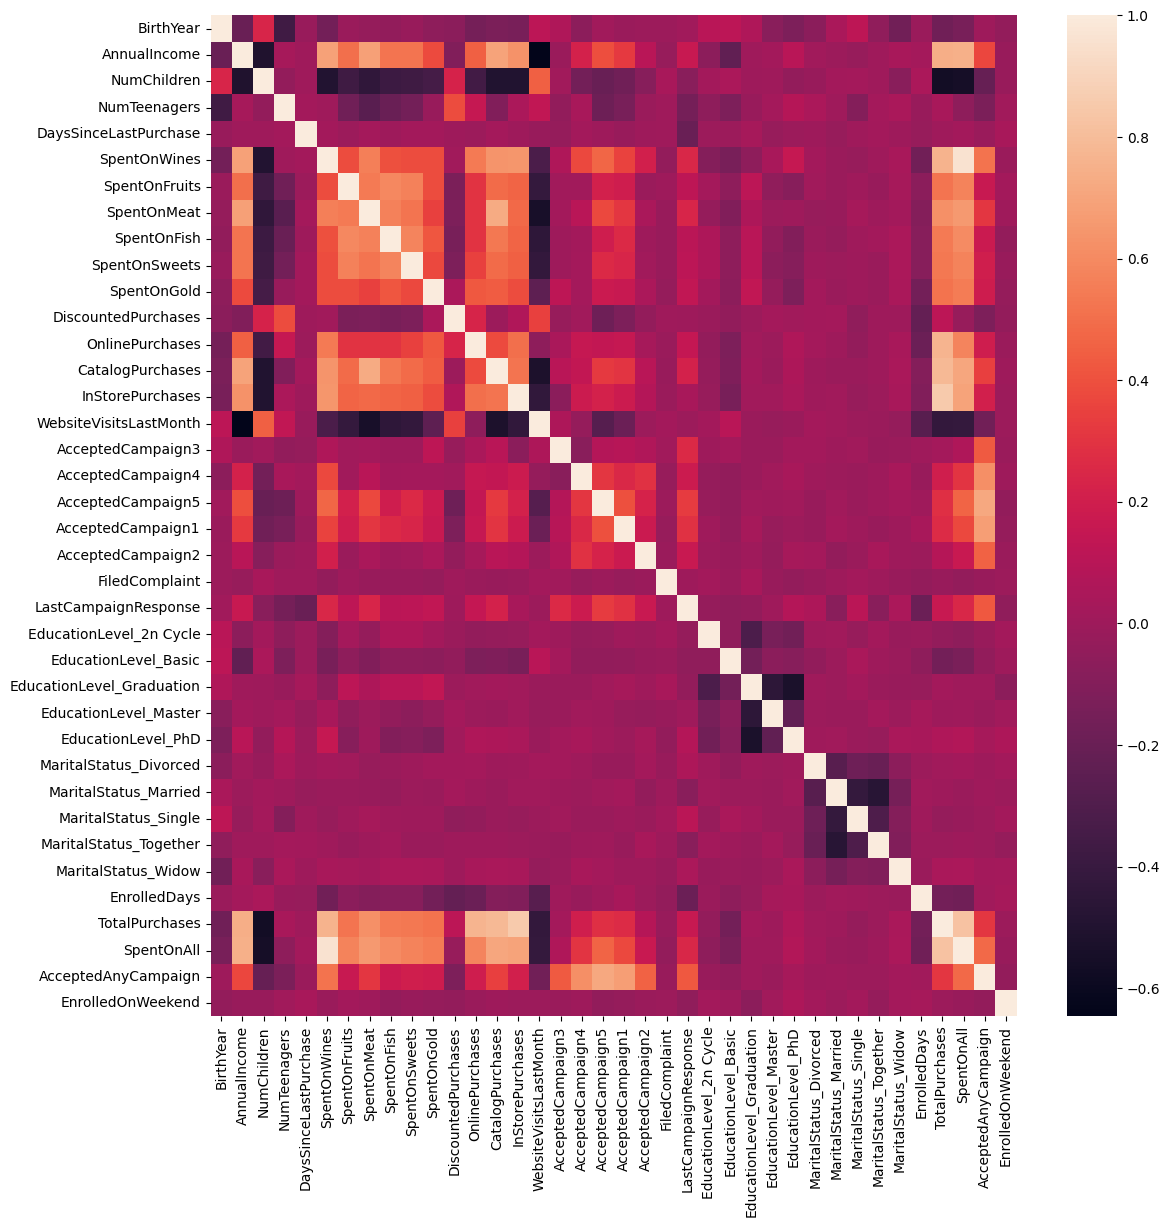

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize']=(13,13)

sns.heatmap(ds.corr())
plt.show()

In [14]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()  # объект для масштабирования данных
x_scaled = min_max_scaler.fit_transform(ds) # масшттабирует данные датафрейма ds и присваиваем масштабированный массив переменной с именем x_scaled
ds_scaled = pd.DataFrame(x_scaled) # Создает новый датафрейм 
ds_scaled.columns = ds.columns # восстанавливает имена столбцов

ds_scaled.describe()

,BirthYear,AnnualIncome,NumChildren,NumTeenagers,DaysSinceLastPurchase,SpentOnWines,SpentOnFruits,SpentOnMeat,SpentOnFish,SpentOnSweets,SpentOnGold,DiscountedPurchases,OnlinePurchases,CatalogPurchases,InStorePurchases,WebsiteVisitsLastMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,FiledComplaint,LastCampaignResponse,EducationLevel_2n Cycle,EducationLevel_Basic,EducationLevel_Graduation,EducationLevel_Master,EducationLevel_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Together,MaritalStatus_Widow,EnrolledDays,TotalPurchases,SpentOnAll,AcceptedAnyCampaign,EnrolledOnWeekend
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,0.515873,0.312532,0.222446,0.253360,0.496506,0.203661,0.131883,0.096787,0.144462,0.103038,0.121109,0.154928,0.151318,0.095014,0.445754,0.265995,0.073029,0.074821,0.072133,0.064068,0.013441,0.008961,0.148746,0.090054,0.024194,0.504032,0.165323,0.216398,0.103495,0.387097,0.215950,0.258961,0.034498,0.494239,0.391899,0.242289,0.074373,0.282706
std,0.208916,0.133323,0.269306,0.272343,0.292421,0.225634,0.199557,0.130871,0.210255,0.157110,0.143295,0.128857,0.103001,0.104341,0.250303,0.121250,0.260242,0.263161,0.258765,0.244929,0.115179,0.094256,0.355917,0.286323,0.153684,0.500096,0.371555,0.411881,0.304672,0.487195,0.411572,0.438162,0.182546,0.289161,0.225332,0.239347,0.169575,0.450416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339286,0.209780,0.000000,0.000000,0.242424,0.016075,0.005025,0.009275,0.011583,0.003802,0.024862,0.066667,0.074074,0.000000,0.230769,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.244278,0.187500,0.026756,0.000000,0.000000
50%,0.535714,0.310916,0.000000,0.000000,0.500000,0.115874,0.040201,0.038841,0.046332,0.030418,0.066298,0.133333,0.148148,0.071429,0.384615,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491416,0.375000,0.160256,0.000000,0.000000
75%,0.660714,0.414184,0.500000,0.500000,0.747475,0.338245,0.165829,0.134493,0.193050,0.125475,0.154696,0.200000,0.222222,0.142857,0.615385,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.741416,0.562500,0.409281,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=15).fit(ds_scaled) #  данные будут разделены на 15 кластеров и обучаем модель на масштабированных данных ds_scaled
k_means.labels_   #  выводит метки кластеров

array([1, 2, 4, ..., 2, 7, 0], dtype=int32)

In [16]:
from sklearn.cluster import AgglomerativeClustering   # агломеративная (иерархическая) кластеризация

ac = AgglomerativeClustering(distance_threshold=15, n_clusters=None).fit(ds_scaled) # количество кластеров будет определяться на основе distance_threshold
ac.labels_     # выводит метки кластеров, присвоенные каждой точке данных в ds_scaled после обучения модели AgglomerativeClustering

array([7, 7, 4, ..., 3, 0, 8])

In [34]:
# создаем график pairplot, который отображает взаимосвязи между всеми парами признаков в данных, окрашенных в соответствии с метками кластеров, 
# полученными с помощью агломеративной кластеризации
ds_with_labels = pd.DataFrame(ds_scaled)
ds_with_labels['label'] = ac.labels_    #Создаем новый столбец с именем 'label' и заполняет его метками кластеров, взятыми из ac.labels_

sns.pairplot(ds_with_labels,hue='label')  # наблюдаем, как признаки коррелируют друг с другом в каждом кластере

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def tsne_plot(X, y, clusters):
    tsne = TSNE(n_components=2)            # размерность выходного пространства 2, что легко визуализировать на графике
    
    X_transformed = tsne.fit_transform(X)   # снижение размерности,  X-матрица преобразуемых признаков
    plt.figure(figsize=(12, 8))
    for x in clusters:
        plt.scatter(
            X_transformed[np.where(y == x), 0],
            X_transformed[np.where(y == x), 1],
            marker='o',
            linewidth=1,
            alpha=0.8,
            label=x
        )

    plt.show()

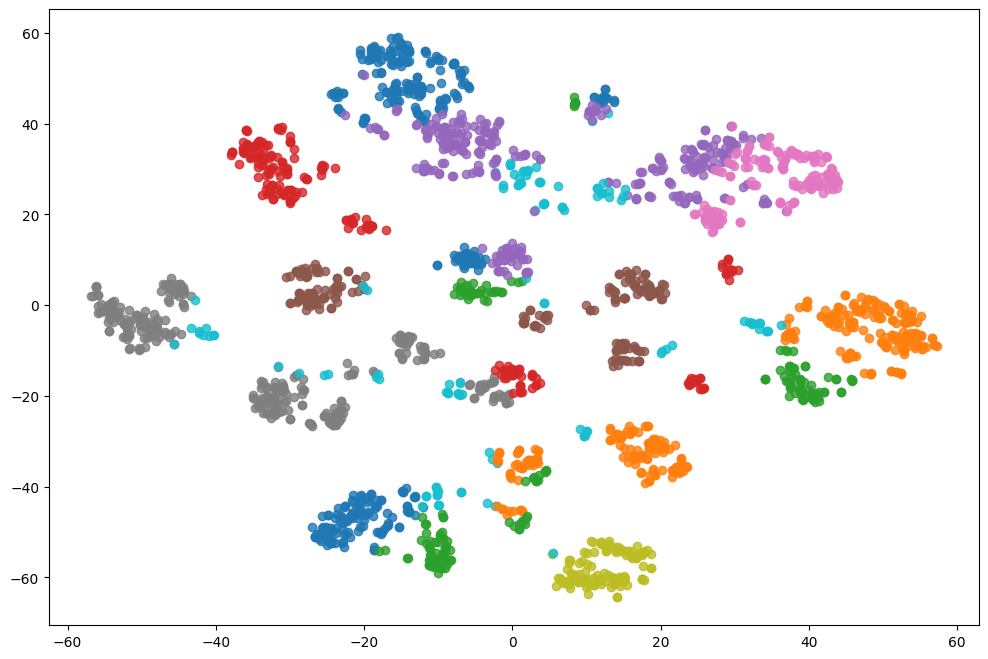

In [19]:
tsne_plot(ds_scaled, k_means.labels_, np.unique(k_means.labels_)) # связывает результаты кластеризации ( KMeans) с визуализацией ( t-SNE)

In [20]:
from sklearn.decomposition import PCA    
#cнижение размерности с помощью PCA 
pca = PCA(n_components=5)  # исходные данные будут преобразованы в новое пространство, состоящее из 5 главных компонентов
low_dimension_ds = pca.fit_transform(ds_scaled)

k_means_pca = KMeans(n_clusters=15).fit(low_dimension_ds)  # создаем и обучаем модель KMeans с 15 кластерами на данных с уменьшенной размерностью 
k_means_pca.labels_    # метки кластеров

array([ 2, 12, 11, ...,  6,  0,  5], dtype=int32)

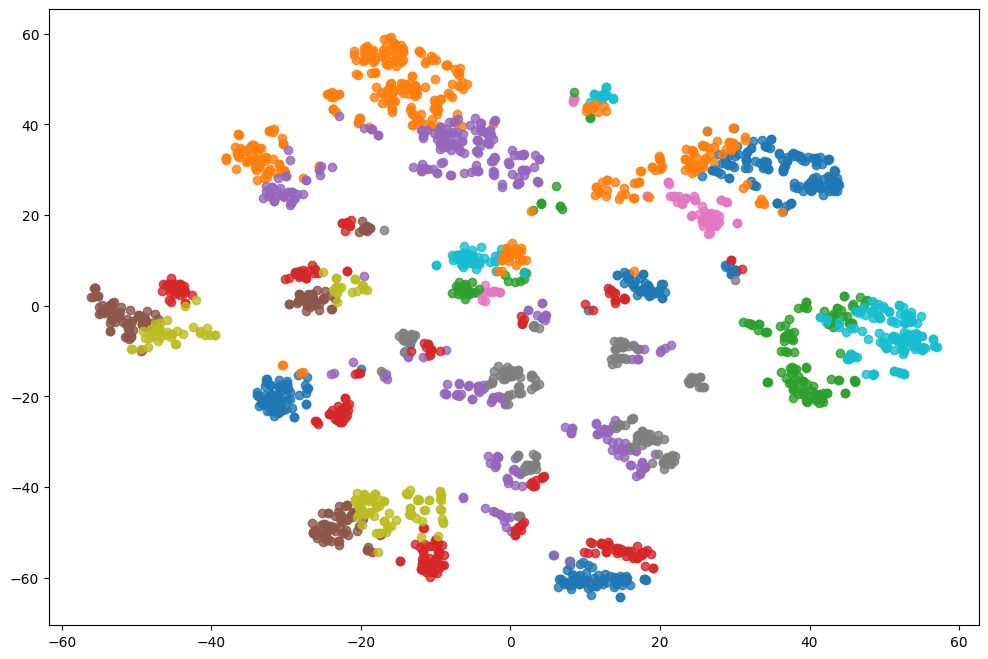

In [21]:
tsne_plot(ds_scaled, k_means_pca.labels_, np.unique(k_means_pca.labels_)) # связывает результаты кластеризации ( KMeans) с PCA

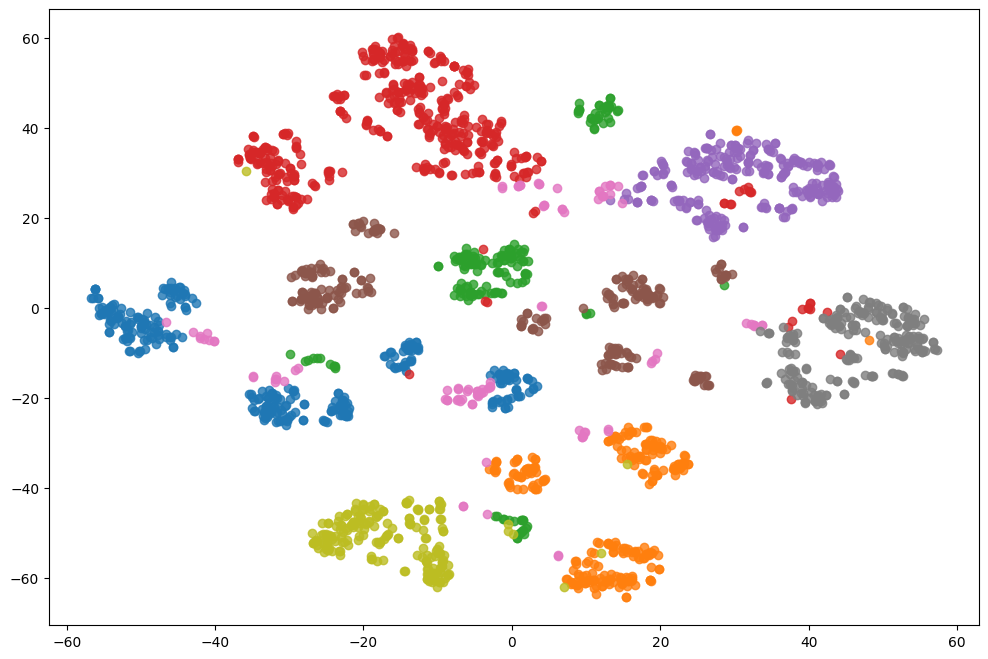

In [22]:
tsne_plot(ds_scaled, ac.labels_, np.unique(ac.labels_)) # визуализацию кластеров, полученных с помощью алгоритма Agglomerative Clustering

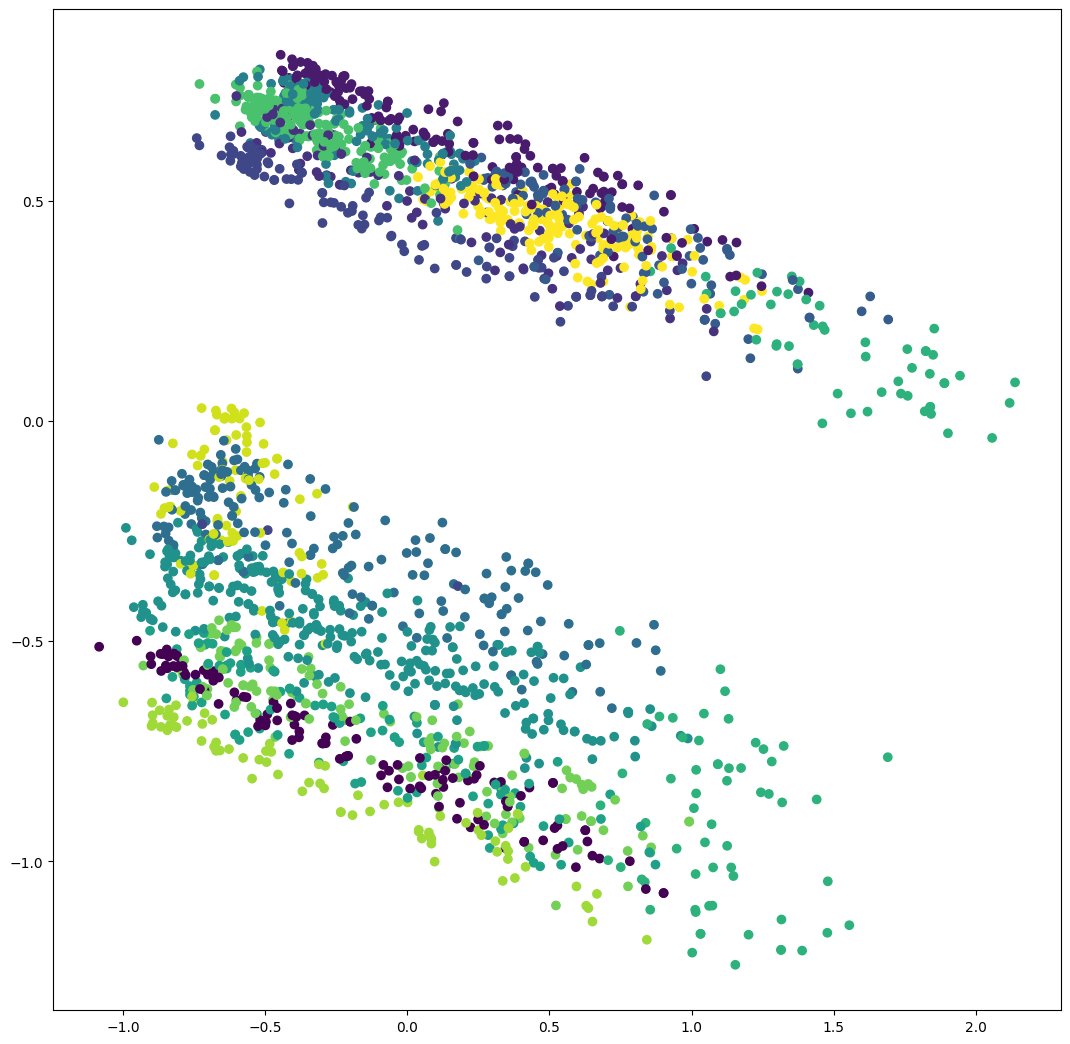

In [23]:
# Снижаем размерность данных до двух компонент с использованием PCA
pca_2feat = PCA(n_components=2)
low_dim_2feat = pca_2feat.fit_transform(ds_scaled)  # новое пространство признаков на основе обучения алгоритм PCA на маштабированных данных 

plt.scatter(low_dim_2feat[:,0], low_dim_2feat[:,1], c=k_means.labels_)  # создаем точечный график

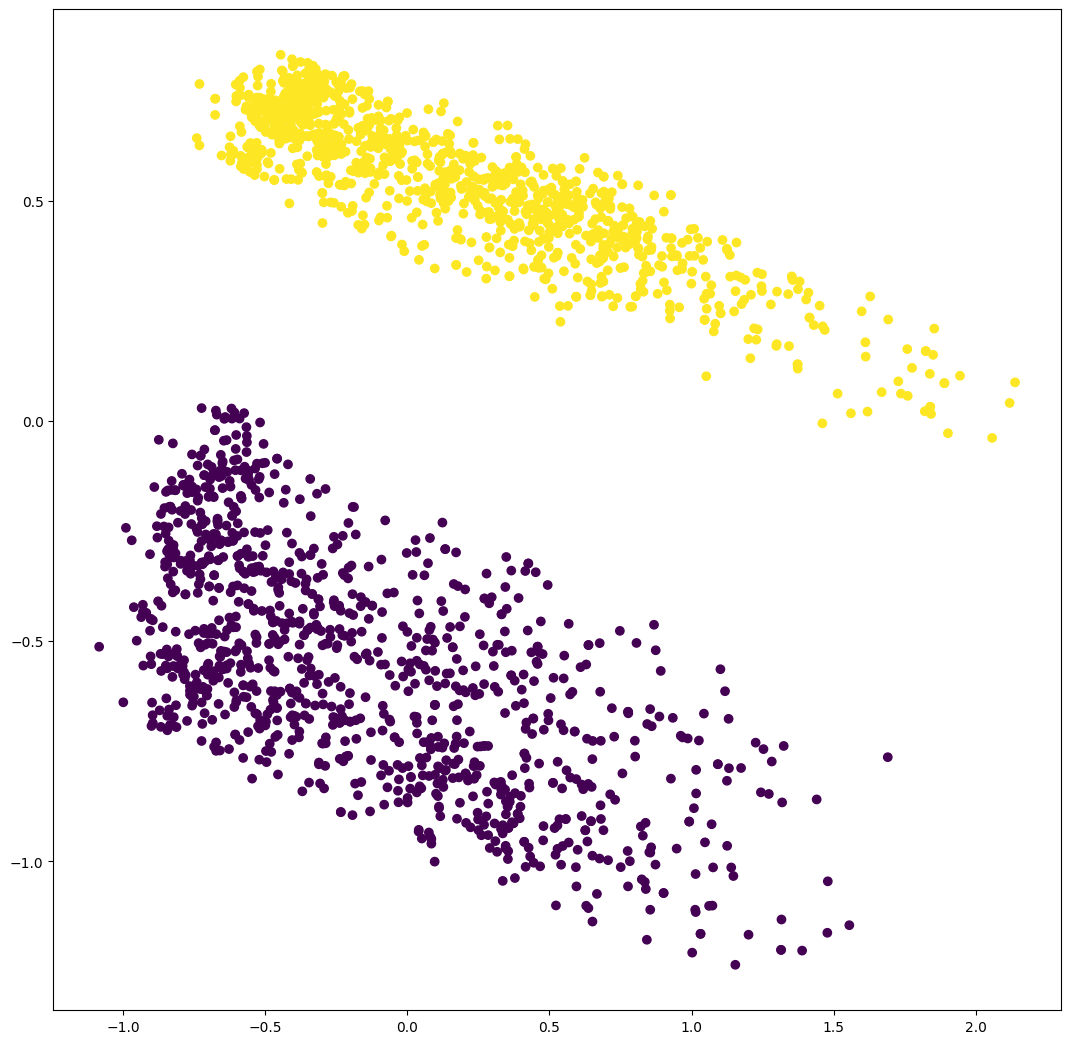

In [24]:
# Применям алгоритм K-средних с двумя кластерами к данным, уже преобразованным с помощью PCA до двух компонент
k_means_2feat = KMeans(n_clusters=2).fit(low_dim_2feat)
plt.scatter(low_dim_2feat[:,0], low_dim_2feat[:,1], c=k_means_2feat.labels_)  
# Ось x соответствует первому главному компоненту PCA, y второму

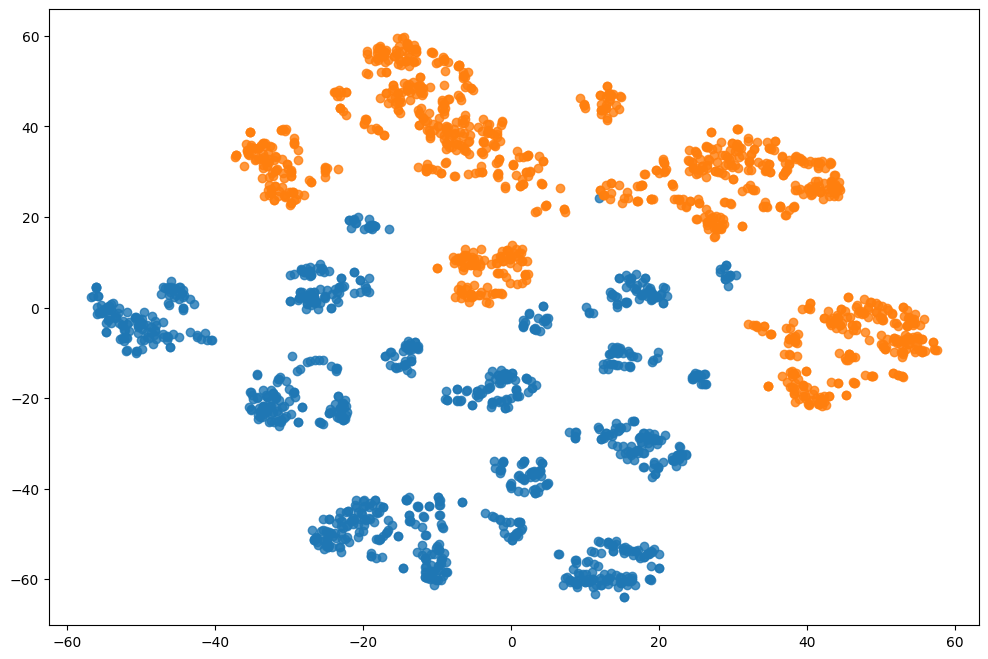

In [25]:
# визуализируем результаты кластеризации, полученные с помощью KMeans, обученного на двух главных компонентах PCA 
tsne_plot(ds_scaled, k_means_2feat.labels_, np.unique(k_means_2feat.labels_)) #

In [26]:
# создаем два новых DataFrame путем разделения исходного ds на основе меток кластеров, присвоенных алгоритмом K-средних 
dataset_cluster1 = ds[k_means_2feat.labels_ == 0]
dataset_cluster2 = ds[k_means_2feat.labels_ == 1]

In [27]:
# создаем отчеты о профилировании данных для каждого из кластеров
profile_cluster1 = ProfileReport(dataset_cluster1)
profile_cluster2 = ProfileReport(dataset_cluster2)

In [38]:
profile_cluster1.to_notebook_iframe()

In [39]:
profile_cluster2.to_notebook_iframe()

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

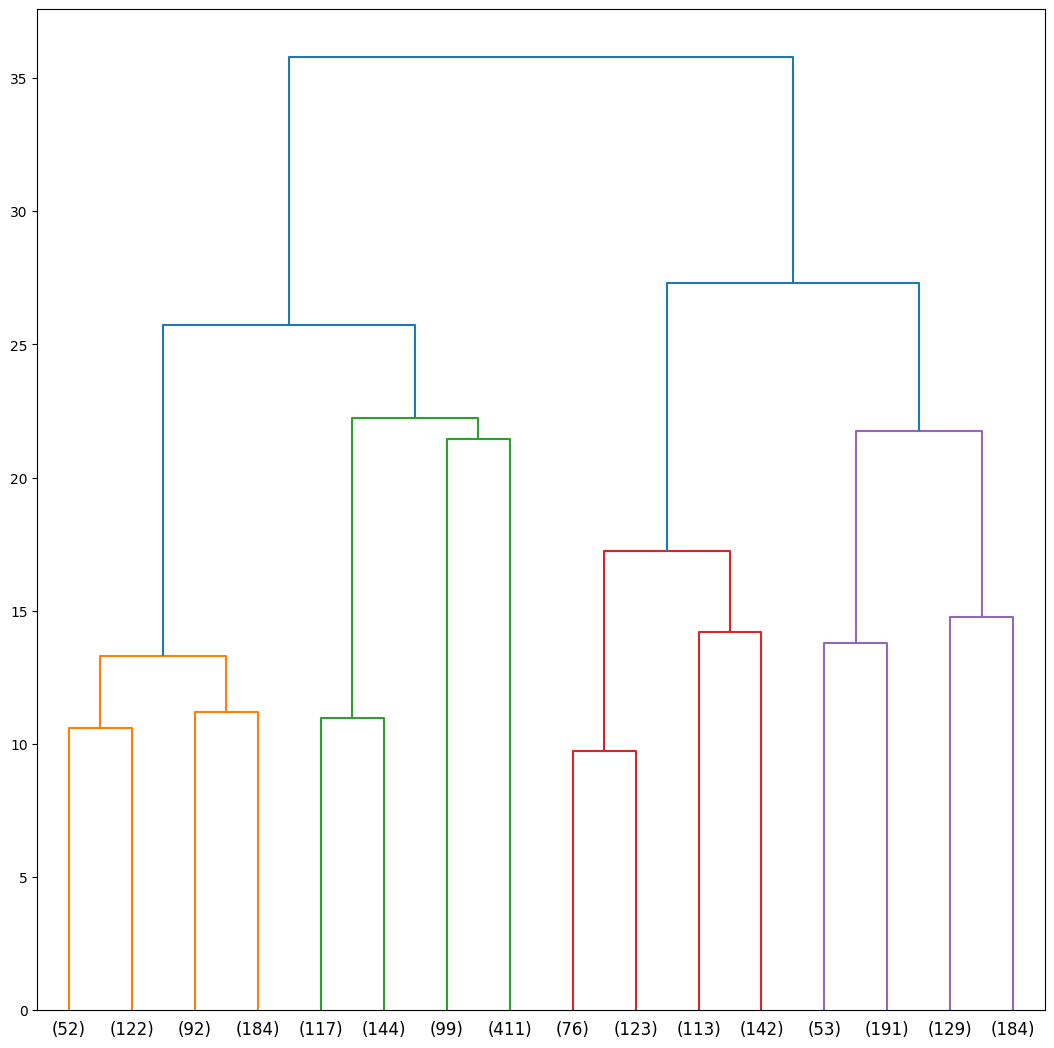

In [31]:
plot_dendrogram(ac, truncate_mode='level', p=3)  # дендрограмма
# визуализация результатов агломеративной (иерархической) кластеризации

In [32]:
ac.feature_names_in_                     # отслеживаем названия признаков

array(['BirthYear', 'AnnualIncome', 'NumChildren', 'NumTeenagers',
       'DaysSinceLastPurchase', 'SpentOnWines', 'SpentOnFruits',
       'SpentOnMeat', 'SpentOnFish', 'SpentOnSweets', 'SpentOnGold',
       'DiscountedPurchases', 'OnlinePurchases', 'CatalogPurchases',
       'InStorePurchases', 'WebsiteVisitsLastMonth', 'AcceptedCampaign3',
       'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedCampaign1',
       'AcceptedCampaign2', 'FiledComplaint', 'LastCampaignResponse',
       'EducationLevel_2n Cycle', 'EducationLevel_Basic',
       'EducationLevel_Graduation', 'EducationLevel_Master',
       'EducationLevel_PhD', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Together', 'MaritalStatus_Widow', 'EnrolledDays',
       'TotalPurchases', 'SpentOnAll', 'AcceptedAnyCampaign',
       'EnrolledOnWeekend'], dtype=object)

In [33]:
ac.children_                        
# Первое значение - индекс первого кластера, который был объединен на этом шаге
# Второе значение - индекс второго кластера, который был объединен на этом шаге

array([[ 515, 1089],
       [ 751, 1386],
       [1029, 1452],
       ...,
       [4450, 4459],
       [4455, 4458],
       [4460, 4461]])